## HW12: Core Data
Valentina Strokopytova

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages

(-0.5, 247.5, 488.5, -0.5)

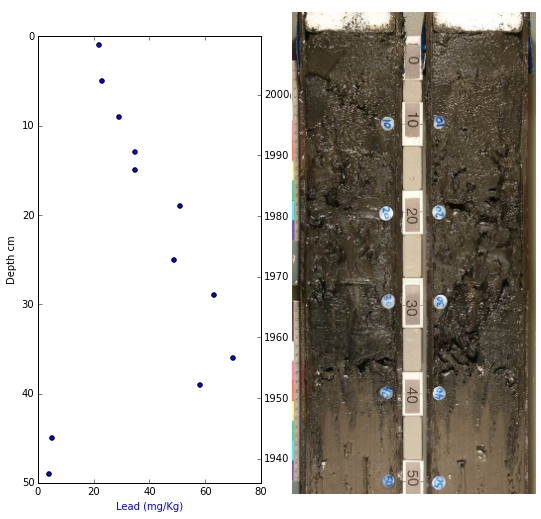

In [26]:
data=pd.read_csv('CoreEM09GC01.csv')

fig,ax=plt.subplots()
fig.set_size_inches(4,8)
ax.scatter(data.Pb,data.DepthCm)
ax.set_ylim([50,0])
ax.set_ylabel('Depth cm')

#second axis for years
ax2=ax.twinx()
ax2.set_ylim([1936,2009.6])
ax2.set_ylabel('Years')
ax.set_xlabel('Lead (mg/Kg)',color='b')
ax.locator_params(nbins=4,axis='x') 
im = plt.imread('core.png')
newax = fig.add_axes([1.0, 0.10, 0.85, 0.85])
newax.imshow(im)
newax.axis('off')


Based on the Chillrud paper, lead, zinc and tin should be most highly correlated due to the evidence of the use of solid waster incinerators. Due to similar chemical/physical properties based on the periodic table, I believe Cd and Zn will be closely correlated as well as Br and Cl and show similar distribution trends over the years and depth. I will plot the above parameters versus depth and years, as well as look at the correlations amongst other elements.

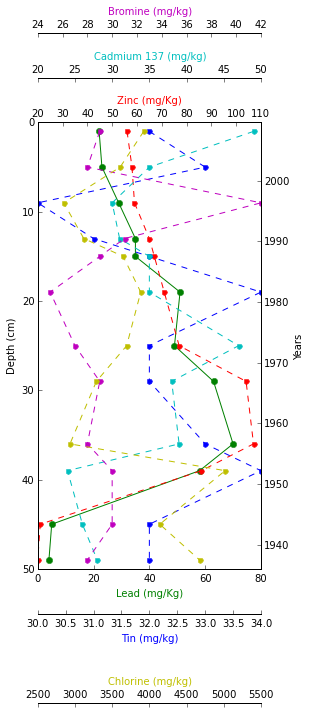

In [63]:
data=pd.read_csv('CoreEM09GC01.csv')

#Pb
fig,ax=plt.subplots()
fig.set_size_inches(4,8)
ax.plot(data.Pb,data.DepthCm,'.g-',markersize=12)
ax.set_ylim([50,0])
ax.set_xlabel('Lead (mg/Kg)',color='g')
ax.set_ylabel('Depth (cm)')
ax.locator_params(nbins=4,axis='x') 

#Zn
ax2=ax.twiny()
ax2.plot(data.Zn,data.DepthCm,'.r--',markersize=10)
ax2.set_xlabel('Zinc (mg/Kg)',color='r')

#Sn
ax3=ax.twiny()
ax3.plot(data.Sn,data.DepthCm,'.b--',markersize=10)
ax3.spines["bottom"].set_position(("axes", -.1))
ax3.set_xlabel('Tin (mg/kg)',color='b')
ax3.xaxis.set_ticks_position('bottom')
ax3.xaxis.set_label_position('bottom')

#Cd
ax4=ax.twiny()
ax4.plot(data.Cd,data.DepthCm,'.c--',markersize=10)
ax4.spines["top"].set_position(("axes", 1.1))
ax4.set_xlabel('Cadmium 137 (mg/kg)',color='c')

#Br
ax5=ax.twiny()
ax5.plot(data.Br,data.DepthCm,'.m--',markersize=10)
ax5.spines["top"].set_position(("axes", 1.2))
ax5.set_xlabel('Bromine (mg/kg)',color='m')

#Cl
ax6=ax.twiny()
ax6.plot(data.Cl,data.DepthCm,'.y--',markersize=10)
ax6.spines["top"].set_position(("axes", -.3))
ax6.set_xlabel('Chlorine (mg/kg)',color='y')

#Second axis
ax2=ax.twinx()
ax2.set_ylim([1936,2009.6])
ax2.set_ylabel('Years')

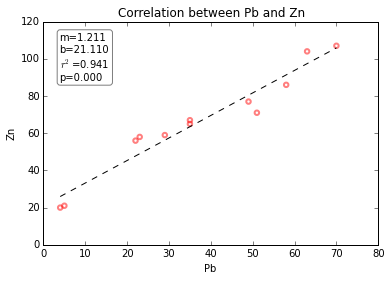

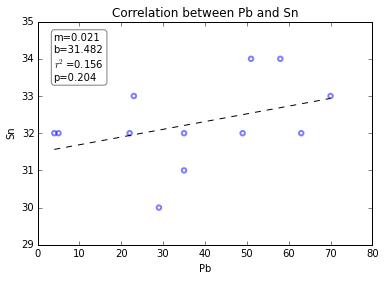

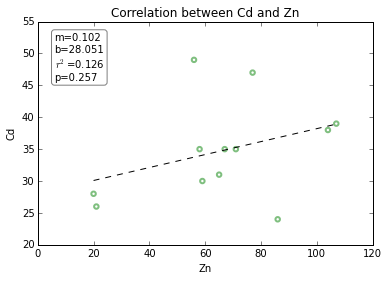

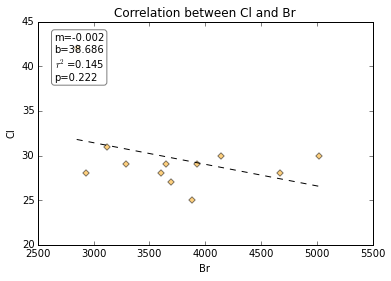

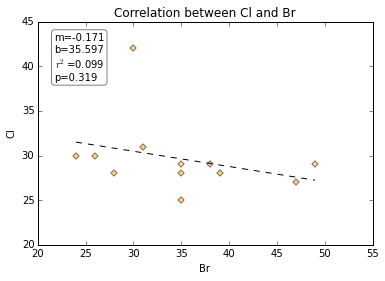

In [48]:
#Pb vs Zn
x=data.Pb
y=data.Zn

xy=x*y
n = len(x)
m = (n*sum(xy)-sum(x)*sum(y))/(n*sum(x*x)-sum(x)**2)
b = (sum(x*x)*sum(y)-sum(x*y)*sum(x))/(n*sum(x*x)-sum(x)**2)
x_fit = np.linspace(min(x),max(x))
y_fit = m*x_fit+b

fig,ax=plt.subplots()
ax.scatter(x,y, marker='o', facecolors='None', alpha= 0.5, color='r', linewidth='2')
results=stats.linregress(x,y)

ax.set_ylabel('Zn')
ax.set_xlabel('Pb')
ax.set_title('Correlation between Pb and Zn')

x_fit=np.linspace(min(x),max(x))
y_fit=results[0]*x_fit+results[1]
ax.plot(x_fit,y_fit,linestyle='--', color='black')

props=dict(boxstyle='round',facecolor='white',alpha=0.5)
textstr='m={:.3f}\nb={:.3f}\n$r^2$={:.3f}\np={:.3f}'.format(results[0],results[1],results[2]**2,results[3])
ax.text(0.05,0.95,textstr,transform=ax.transAxes,fontsize=10,verticalalignment='top',bbox=props)

#Pb vs Sn
x=data.Pb
y=data.Sn

fig,ax=plt.subplots()
ax.scatter(x,y, marker='o', facecolors='None', alpha= 0.5, color='b', linewidth='2')
results=stats.linregress(x,y)

ax.set_ylabel('Sn')
ax.set_xlabel('Pb')
ax.set_title('Correlation between Pb and Sn')

x_fit=np.linspace(min(x),max(x))
y_fit=results[0]*x_fit+results[1]
ax.plot(x_fit,y_fit,linestyle='--', color='black')

props=dict(boxstyle='round',facecolor='white',alpha=0.5)
textstr='m={:.3f}\nb={:.3f}\n$r^2$={:.3f}\np={:.3f}'.format(results[0],results[1],results[2]**2,results[3])
ax.text(0.05,0.95,textstr,transform=ax.transAxes,fontsize=10,verticalalignment='top',bbox=props)

#Zn vs Cd
x=data.Zn
y=data.Cd

fig,ax=plt.subplots()
ax.scatter(x,y, marker='o', facecolors='None', alpha= 0.5, color='g', linewidth='2')
results=stats.linregress(x,y)

ax.set_ylabel('Cd')
ax.set_xlabel('Zn')
ax.set_title('Correlation between Cd and Zn')

x_fit=np.linspace(min(x),max(x))
y_fit=results[0]*x_fit+results[1]
ax.plot(x_fit,y_fit,linestyle='--', color='black')

props=dict(boxstyle='round',facecolor='white',alpha=0.5)
textstr='m={:.3f}\nb={:.3f}\n$r^2$={:.3f}\np={:.3f}'.format(results[0],results[1],results[2]**2,results[3])
ax.text(0.05,0.95,textstr,transform=ax.transAxes,fontsize=10,verticalalignment='top',bbox=props)

#Cl and Br
x=data.Cl
y=data.Br

fig,ax=plt.subplots()
ax.scatter(x,y, marker='D', alpha= 0.5, color='orange', edgecolor='black',linewidth='1')
results=stats.linregress(x,y)

ax.set_ylabel('Cl')
ax.set_xlabel('Br')
ax.set_title('Correlation between Cl and Br')

x_fit=np.linspace(min(x),max(x))
y_fit=results[0]*x_fit+results[1]
ax.plot(x_fit,y_fit,linestyle='--', color='black')

props=dict(boxstyle='round',facecolor='white',alpha=0.5)
textstr='m={:.3f}\nb={:.3f}\n$r^2$={:.3f}\np={:.3f}'.format(results[0],results[1],results[2]**2,results[3])
ax.text(0.05,0.95,textstr,transform=ax.transAxes,fontsize=10,verticalalignment='top',bbox=props)


Cl and Br show a negative trend with some correlation around 0.145. Cd and Zn showed significant variation with a correlation of 0.126, lower than expected. These correlations were not as high as for Pb and Zn/Sn with r$^2$ values of 0.941 and 0.156 respectively. The Cl/BR and Cd/Zn correlations could be revaluated and show closer correlations with more frequent data provided.